## Exercise

In the shared drive ```cds-vis-data```, you'll find a directory comprising 1360 different images of flowers. Many of these are different images of the same flower.

In groups, do the following activity:

- Pick a random flower from the dataset, load it, and normalize it
- Compare that image's colour histogram to every *other* flower in the dataset
- Print save the filename of the 5 closest images, along with the distance score you calculated
  - **Hint:** use ```pandas```
- Qualitatively inspect the images - how does your algorithm perform?
- Rewrite your code as a function which takes any input filename from a user and produces the new results showing top 5 closest images for the chosen image

This in-class exercise is going to be *Assignment 1* for Visual Analytics, designing a simple *image search* algorithm. The Github classroom repo for this Assignment will go online later.

In [6]:
# We need to include the home directory in our path, so we can read in our own module.
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt
import pandas as pd

### Enter the folder and make a random choice

In [12]:
# path to folder
folder_path = os.path.join("..", "..", "..", "431824", "flowers")
# list of images in folder
comp_imgs = os.listdir(folder_path)

In [14]:
# select the image we will use as reference image
ref_img = random.choice(folder_dir)
# remove reference image from list of comparison images
comp_imgs.remove(ref_img)

### Functions

In [17]:
# function for loading image, creating histogram and normalizing values
def load_hist_norm(filename):

    # load image
    image = cv2.imread(filename)
    # create histogram for image
    hist = cv2.calcHist([image], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])
    # normalize histogram values
    hist = cv2.normalize(hist, hist, 0, 1.0, cv2.NORM_MINMAX)

    return(hist)

### Loop

In [19]:
# get file name
ref_file = os.path.join("..", "..", "..", "431824", "flowers", ref_img)

# load reference file, create histogram and normalize
ref_hist = load_hist_norm(ref_file)

In [20]:
# columns for output file
cols = ["Reference file", "Comparison file", "ChiSqr"]

# set up data frame to receive output
summary = pd.DataFrame(columns = cols)

In [26]:
for comp_img in comp_imgs:
    
    # get file name of comparison image
    comp_file = os.path.join("..", "..", "..", "431824", "flowers", comp_img)

    # load reference file, create histogram and normalize
    comp_hist = load_hist_norm(comp_file)

    # compare the two histograms
    chisqr = round(cv2.compareHist(ref_hist, comp_hist, cv2.HISTCMP_CHISQR), 2)

    # info for output data frame
    info = list([ref_img, comp_img, chisqr])
    new_row = pd.DataFrame([info], columns = cols)

    # append to data frame
    summary = pd.concat([summary, new_row], ignore_index = True)

In [40]:
# reorder data frame by ChiSqr
summary = summary.sort_values(by = ['ChiSqr'])
closest = summary.iloc[0:5, 1]

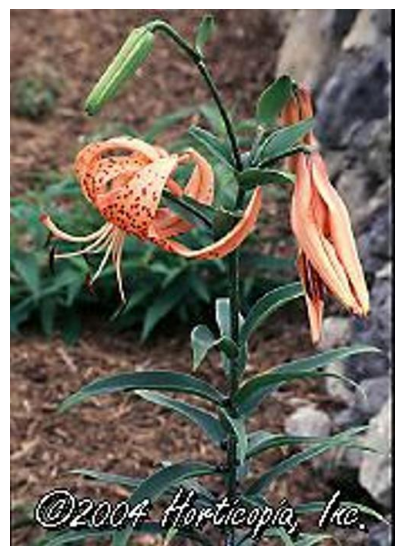

In [43]:
ref = os.path.join("..", "..", "..", "431824", "flowers", ref_img)
ref_image = cv2.imread(ref)
jimshow(ref_image)

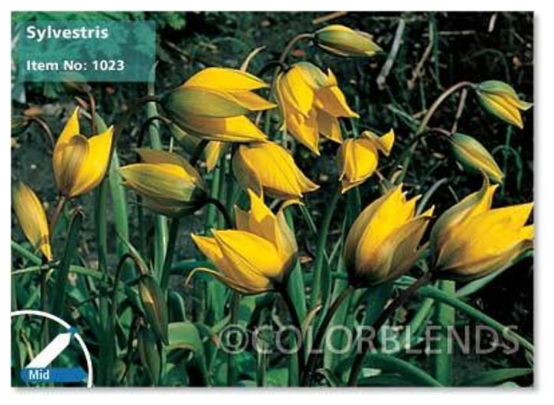

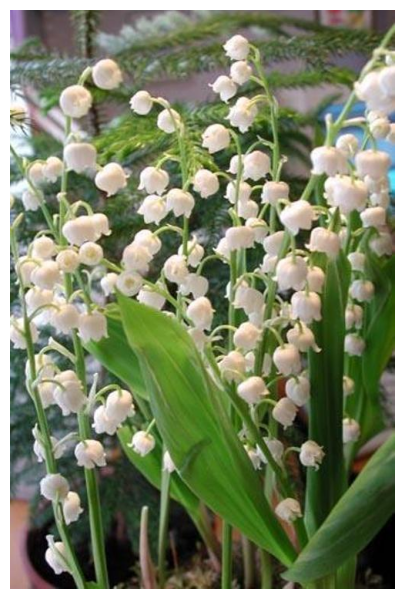

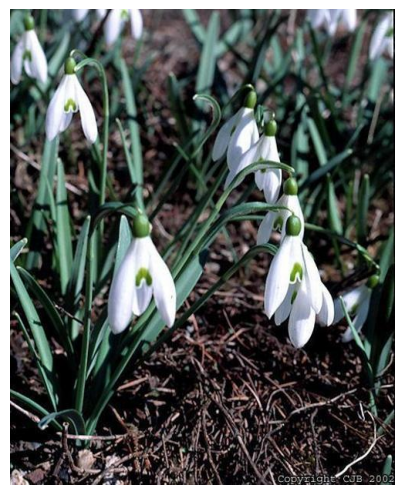

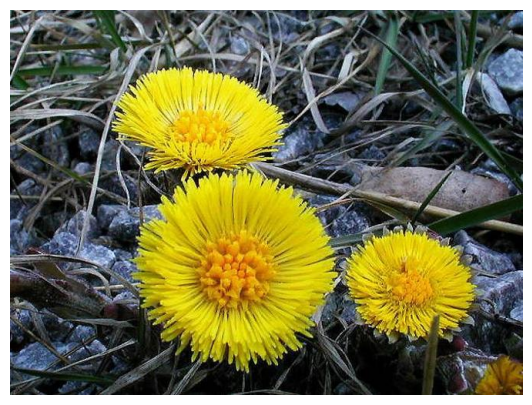

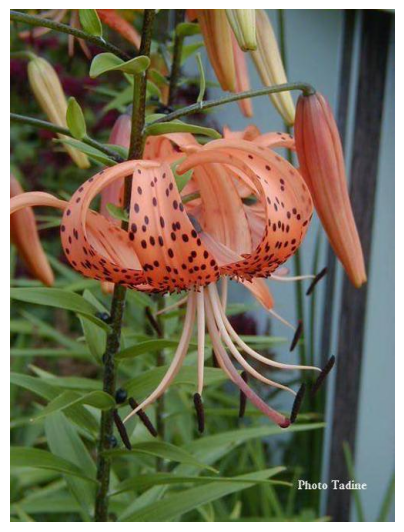

In [42]:
for i in closest:

    # get filename
    filename = os.path.join("..", "..", "..", "431824", "flowers", i)

    # load image
    image = cv2.imread(filename)

    # show image
    jimshow(image)


function(folder_path, filename)